<h1 style="font-size: 50px; color: #0059b3 ;text-align: center;
">  Airline Passenger Satisfaction Prediction </h1>

### In this project i am trying to predict the customer satisfaction of air lines. The dataset contains data from an airline passenger satisfaction survey.

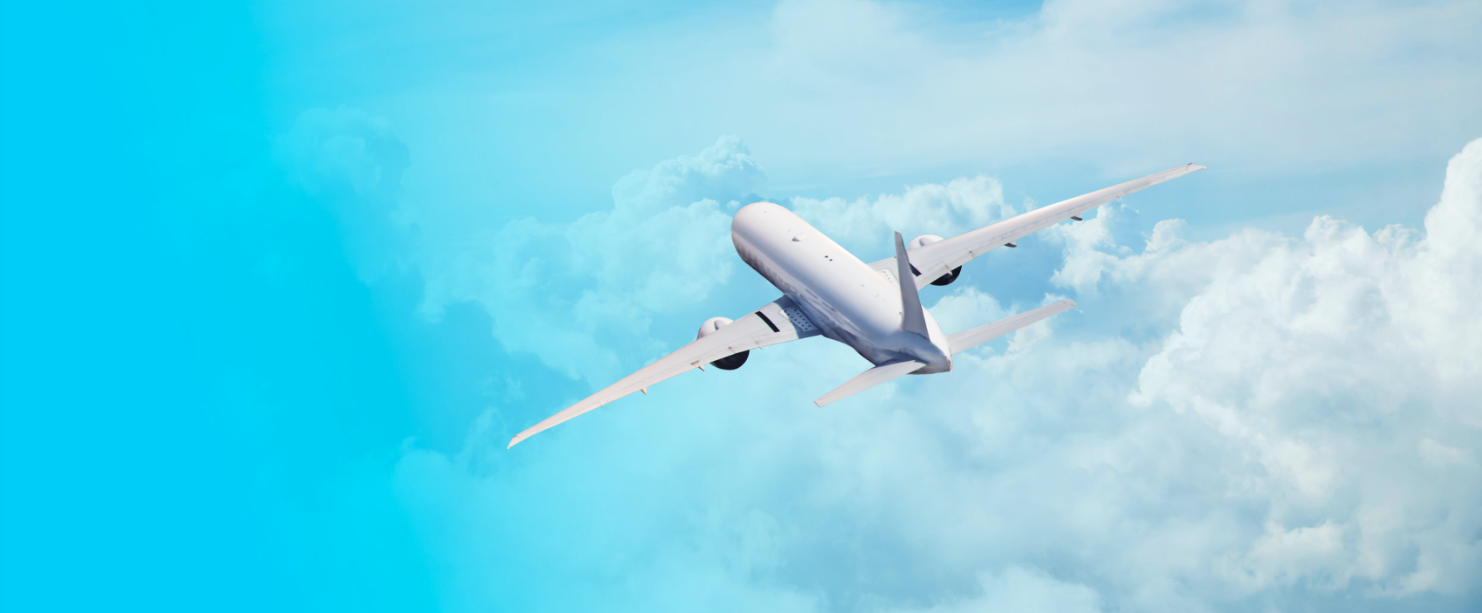

## Import libraries and packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, roc_curve
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier

## Reading Dataset

In [2]:
df=pd.read_csv('airline.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### Let’s have a look at the insights of the columns to understand the data type of all the columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

 ### Then find out How many Raws and columns that the dataset contains


In [4]:
df.shape

(103904, 25)

## Finding the statistical meashures

In [5]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Let’s have a look at whether this dataset contains any null values or not

In [6]:
df.isnull().mean()*100

Unnamed: 0                           0.000000
id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                       

## check whether any duplicate values

In [7]:
df.duplicated().sum()

0

<h1 style="font-size: 30px; color: #003380 ;text-align: center;
"> Exploratory Data Analysis </h1>

## Univariate analysis

### Analyze the data by Plotiing the Histplot

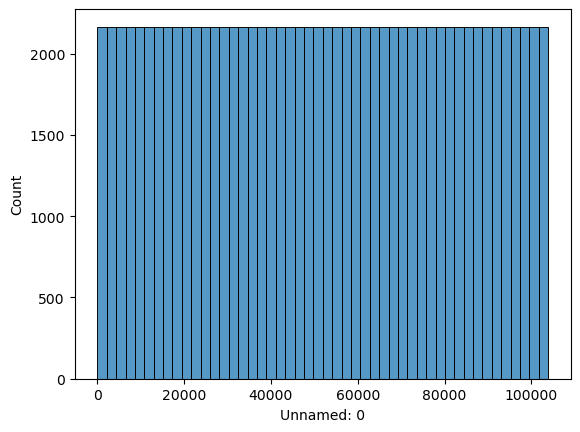

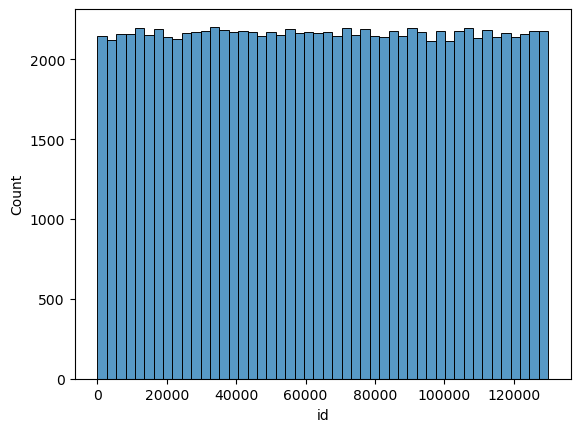

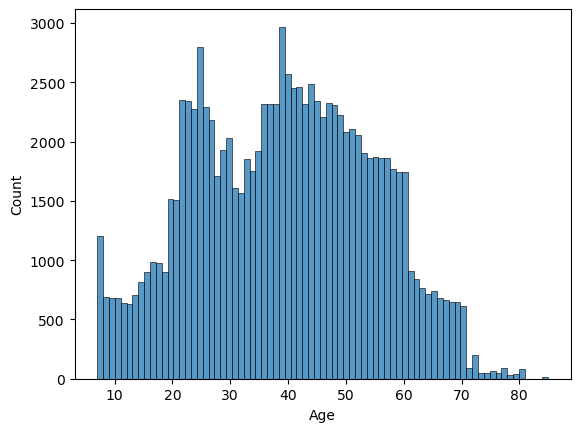

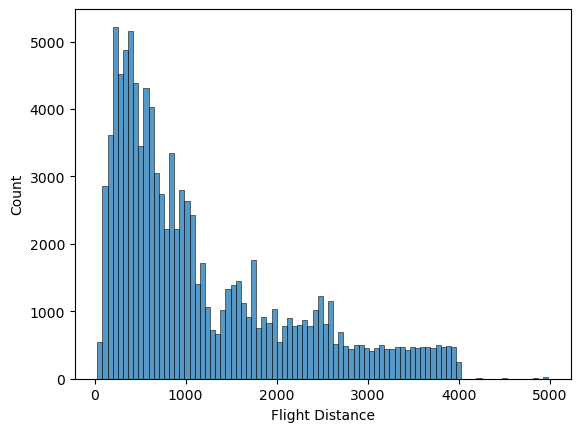

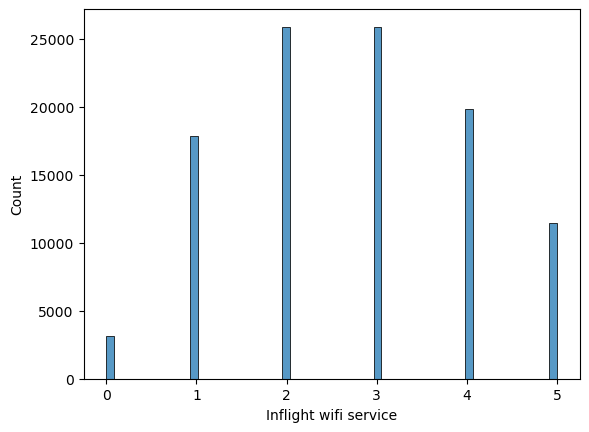

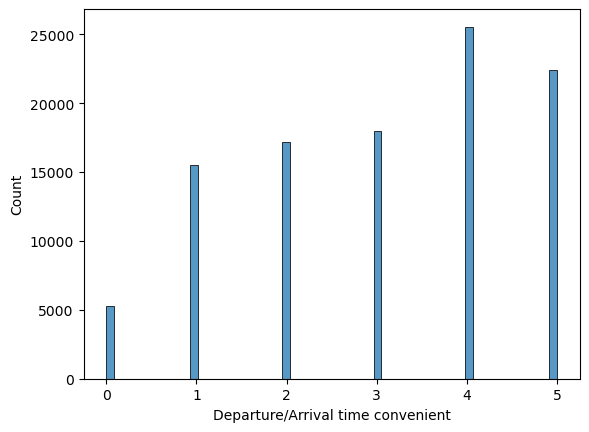

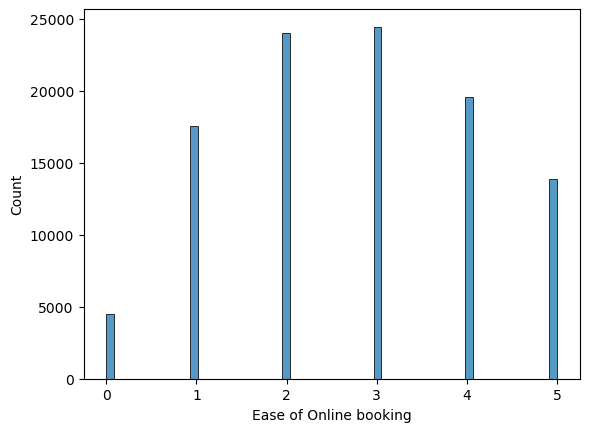

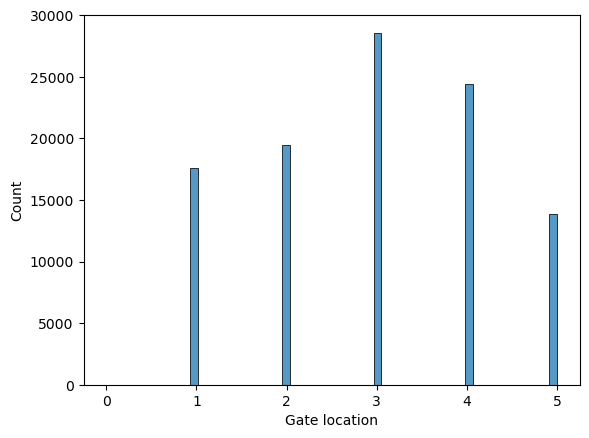

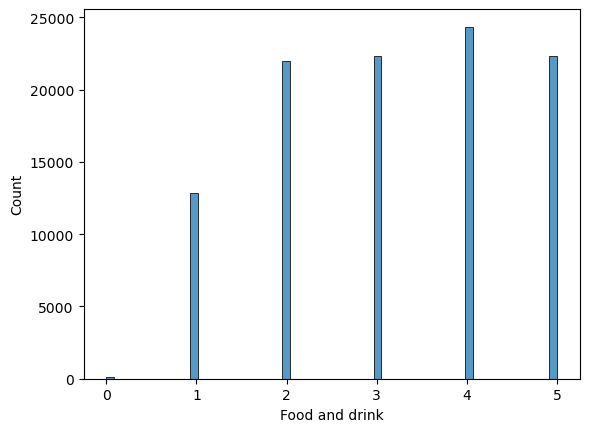

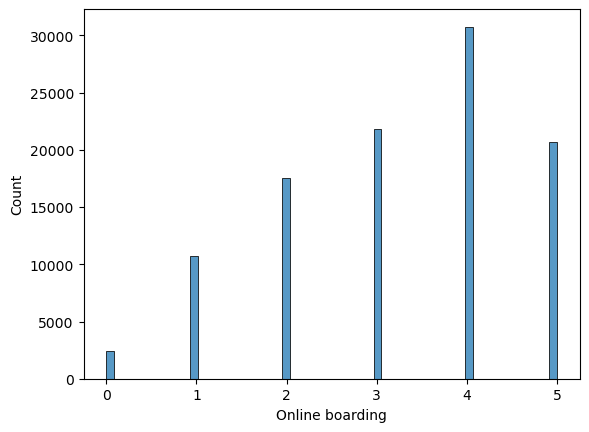

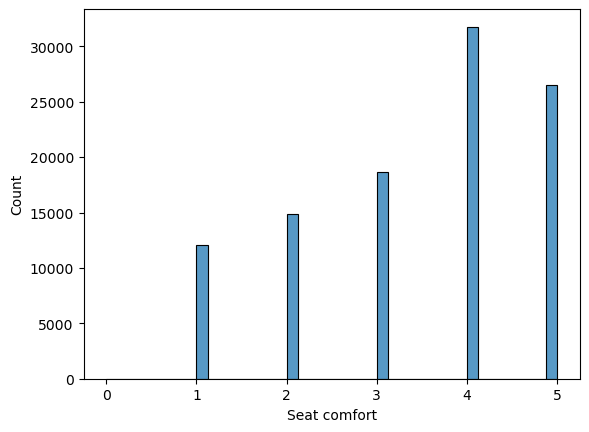

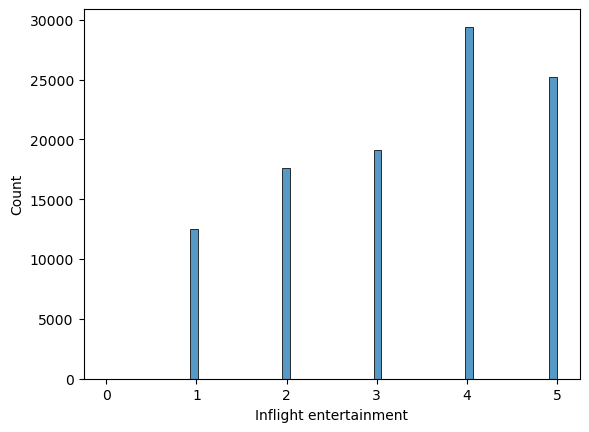

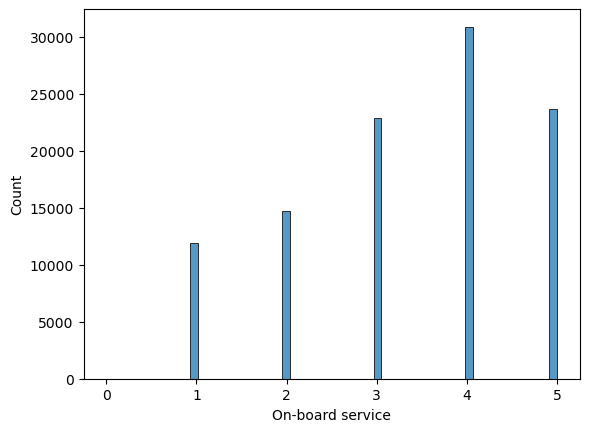

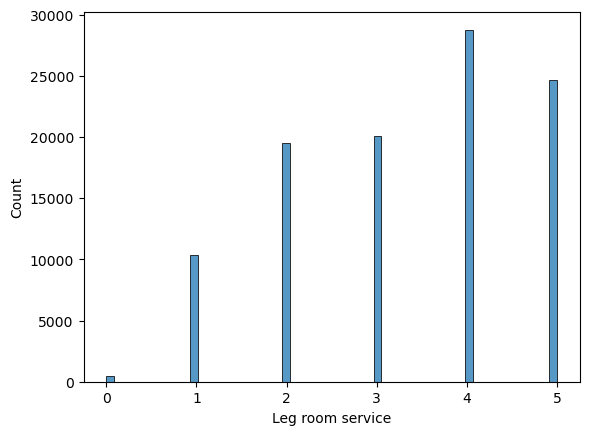

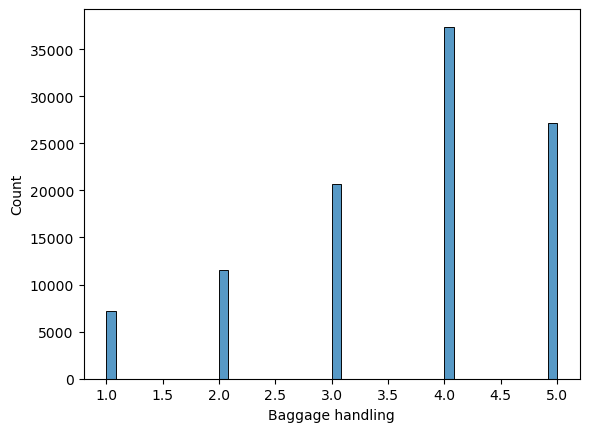

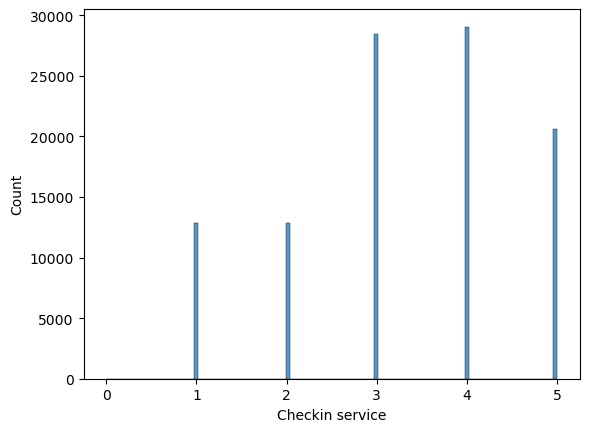

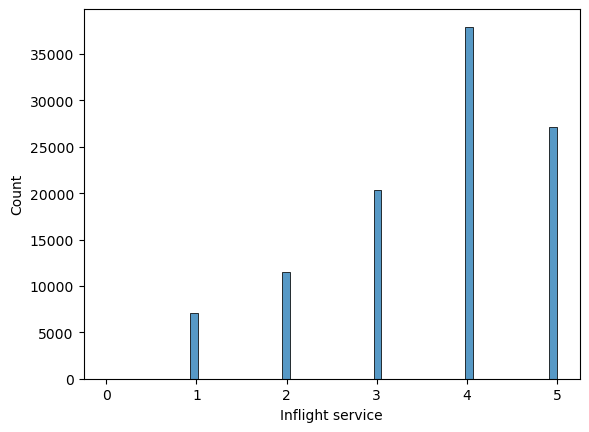

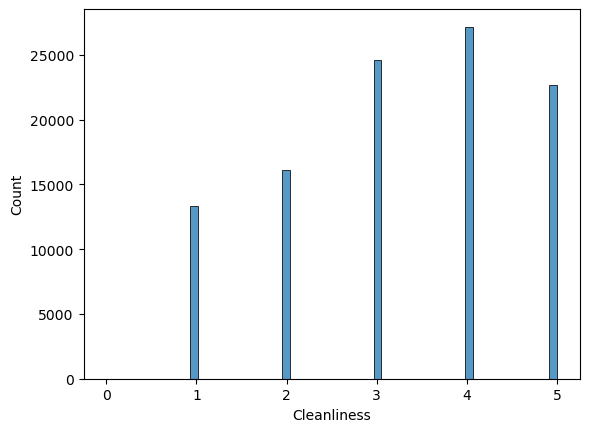

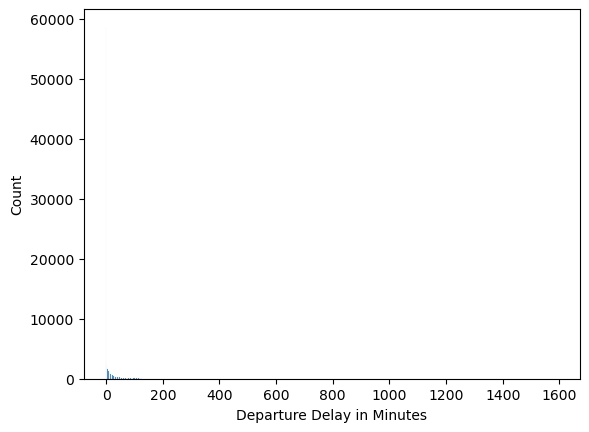

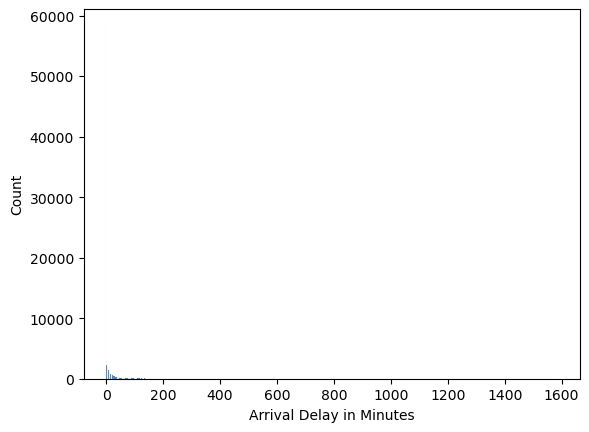

In [8]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.histplot( x =df[i])
        plt.show()

### Analyze the data by plottinig kde plot

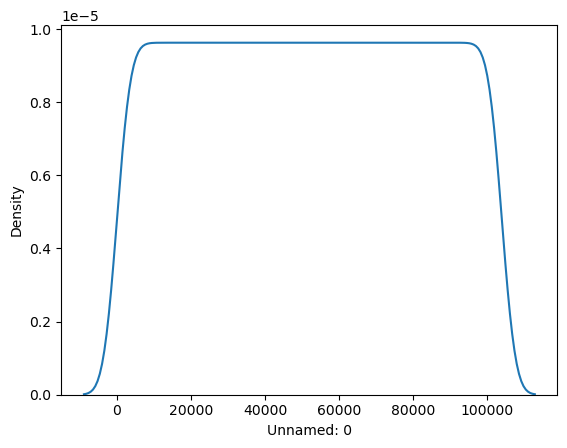

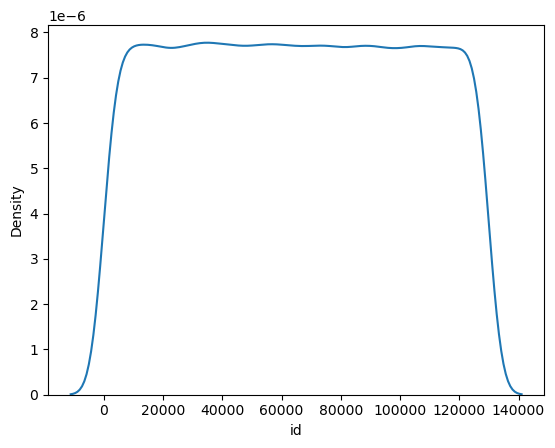

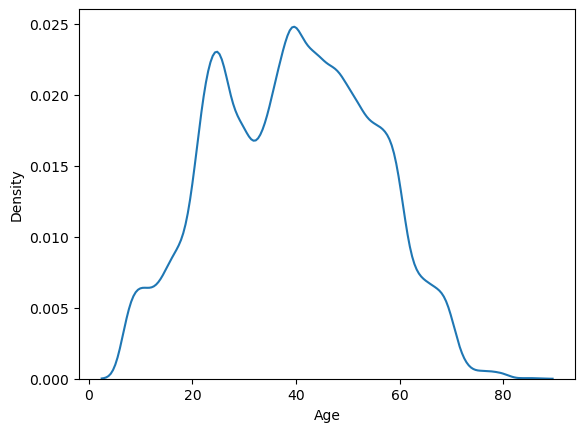

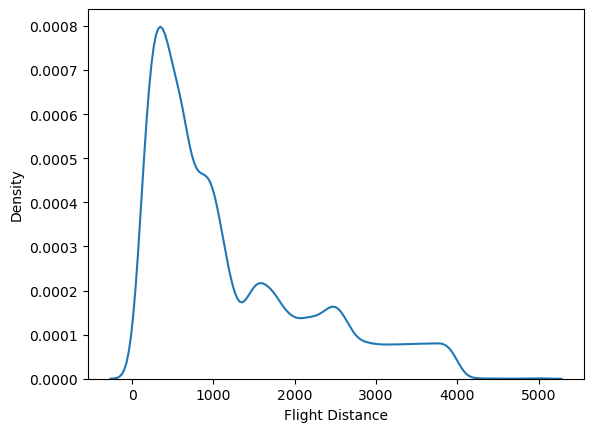

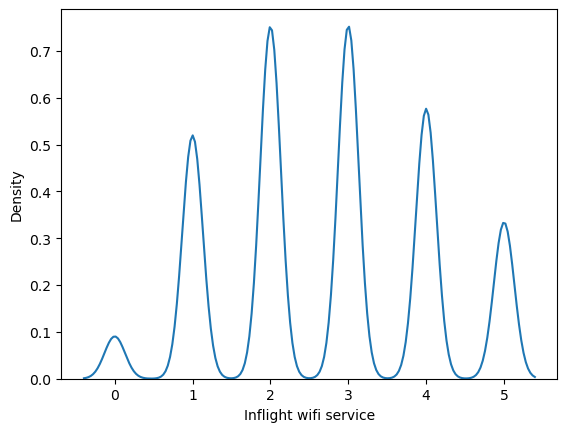

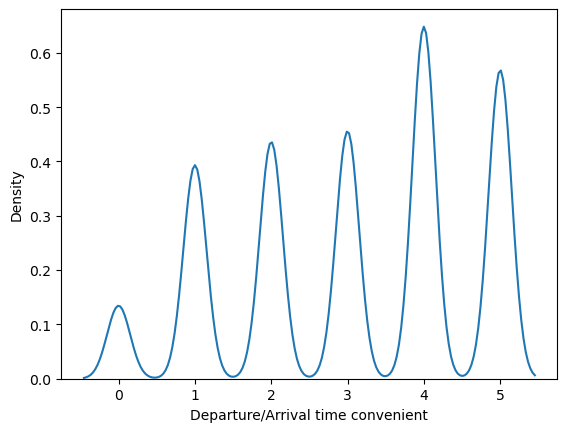

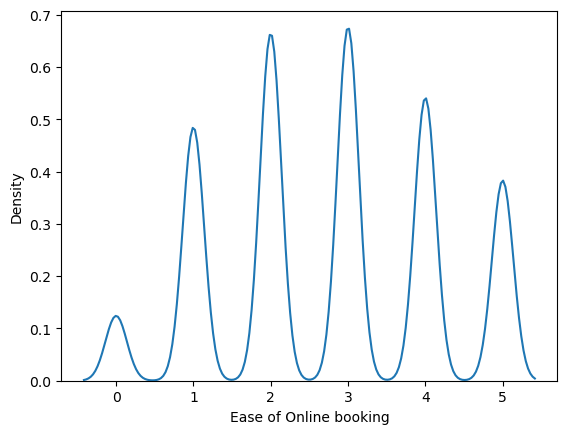

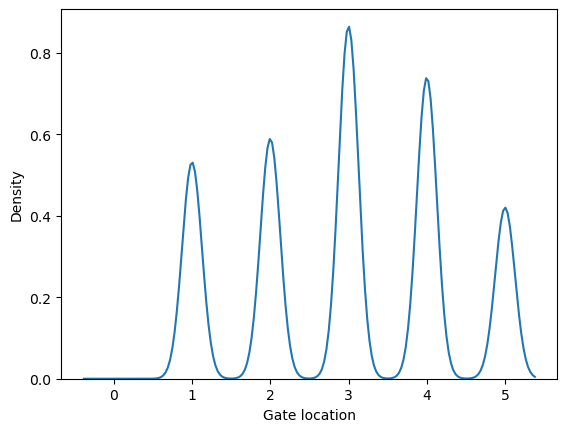

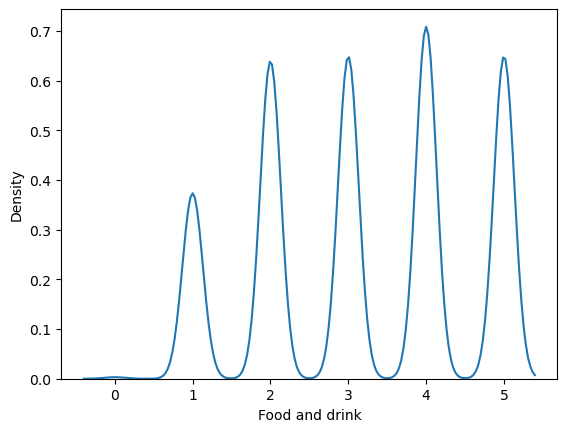

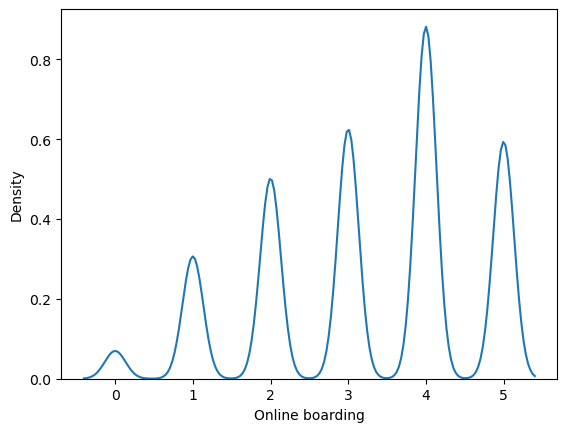

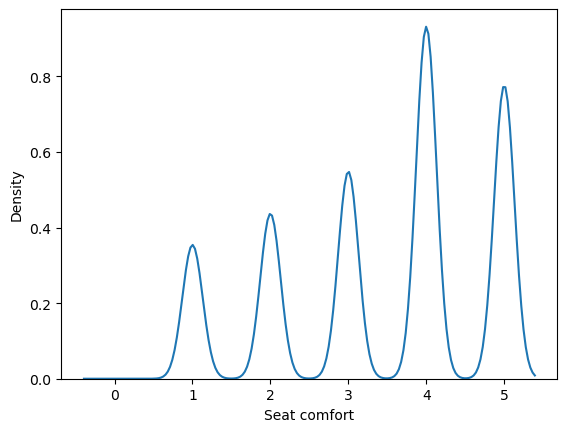

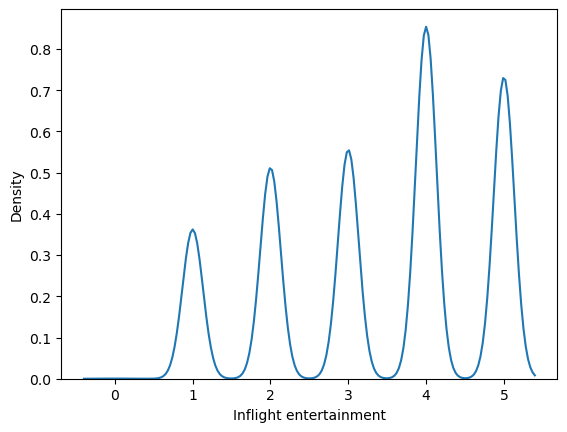

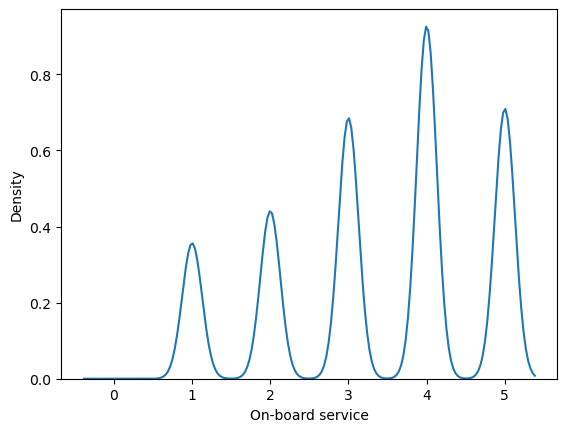

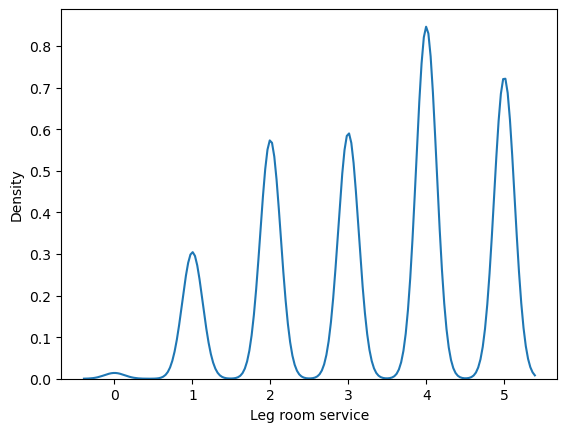

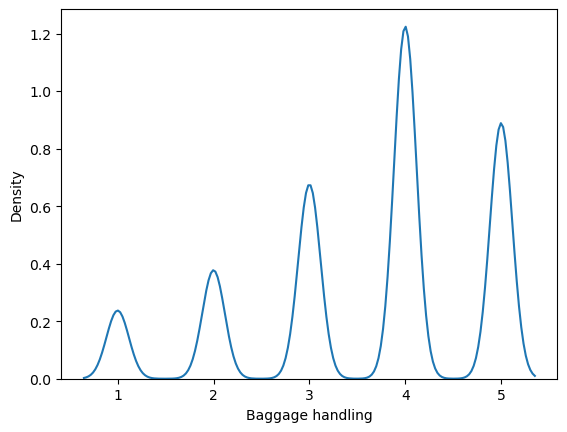

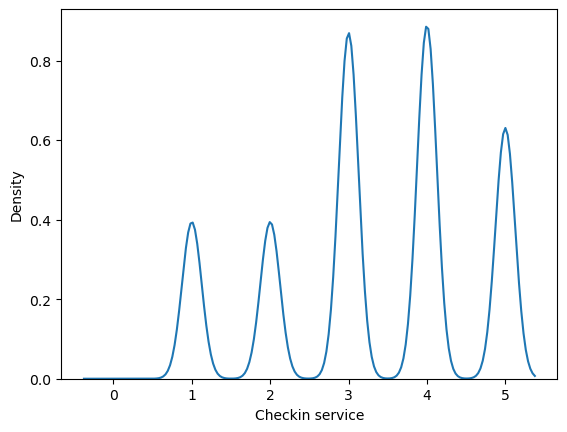

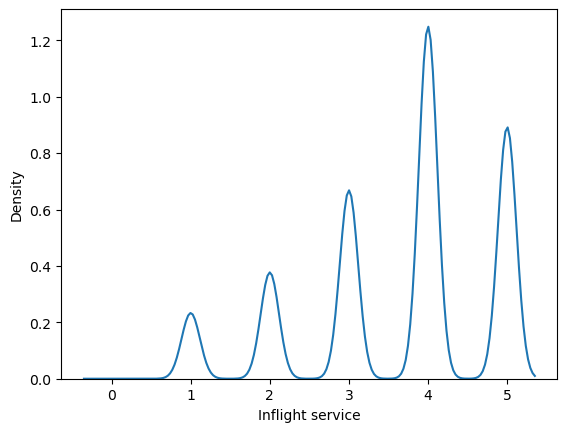

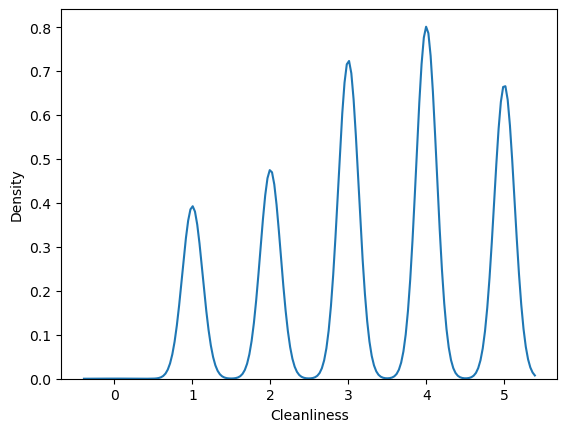

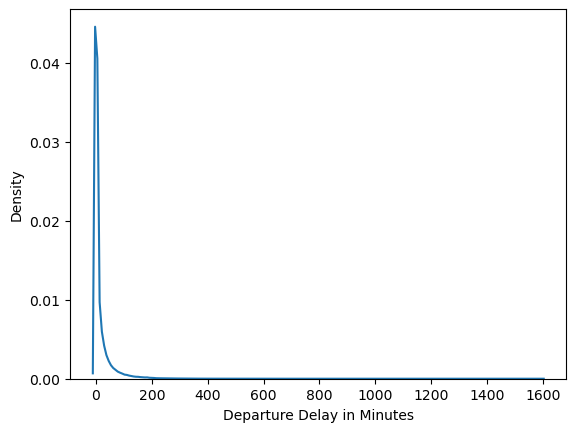

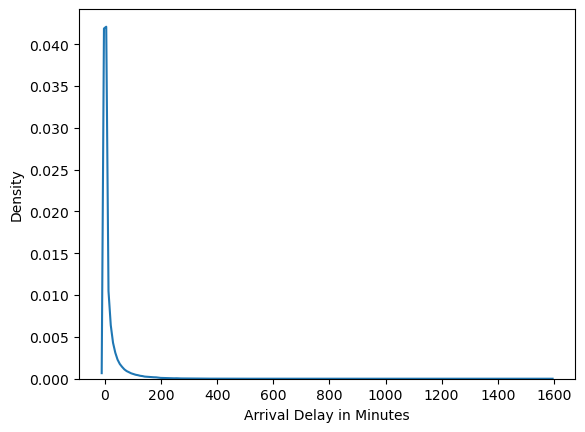

In [9]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.kdeplot( x =df[i])
        plt.show()

Female    52727
Male      51177
Name: Gender, dtype: int64


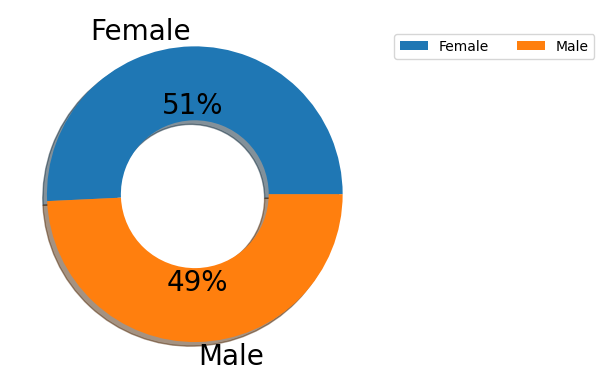

In [10]:
## How many males and females were travelling
g=df["Gender"].value_counts()
print(g)
plt.pie(g,labels=df["Gender"].value_counts().index,autopct="%0.0f%%",shadow=True,wedgeprops={"width":0.5},textprops={"fontsize":20})
plt.legend(loc="center right",bbox_to_anchor=(1.6, 0.9),ncol=2);

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64


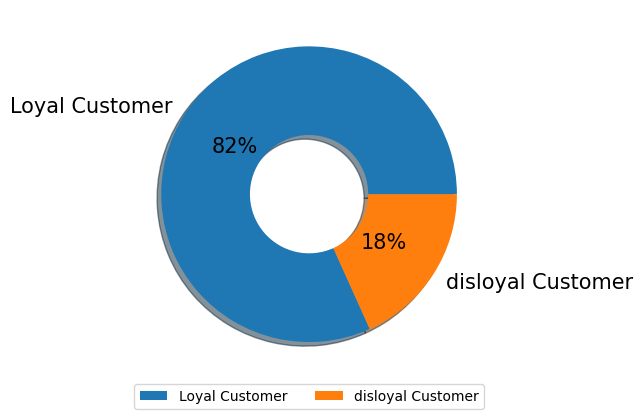

In [11]:
# How many customers types were there
c=df["Customer Type"].value_counts()
print(c)
plt.pie(c,labels=df["Customer Type"].value_counts().index,autopct="%0.0f%%",shadow=True,wedgeprops={"width":0.6},textprops={"fontsize":15})
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=2);

In [12]:
## What were the avg, min and max age group travelling 
df["Age"].agg(["mean","min","max"]).to_frame()


,Age
mean,39.379706
min,7.000000
max,85.000000


Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64


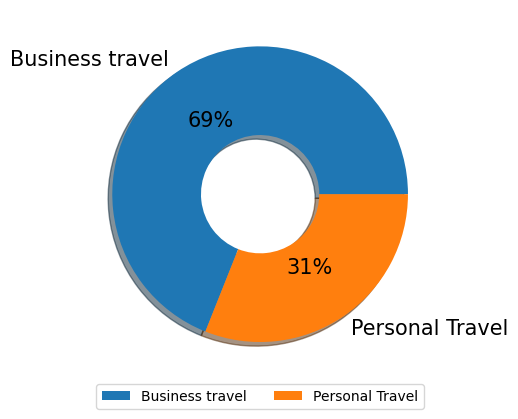

In [13]:
# Which type of travel were frequend
t=df["Type of Travel"].value_counts()
print(t)
plt.pie(t,labels=df["Type of Travel"].value_counts().index,autopct="%0.0f%%",shadow=True,wedgeprops={"width":0.6},textprops={"fontsize":15})
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=2);

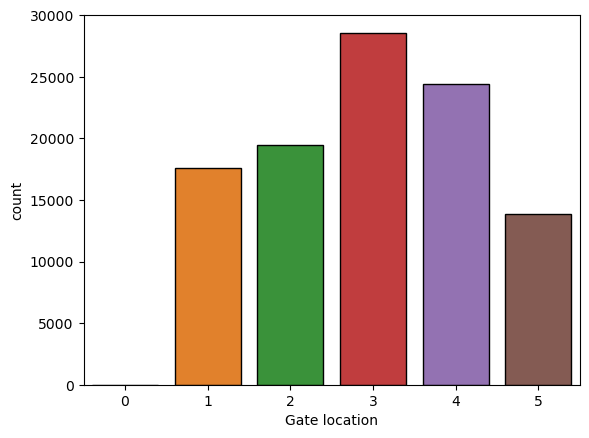

In [14]:
# what was the satisfaction of Gate location
sns.countplot(x="Gate location",data=df,edgecolor="black");

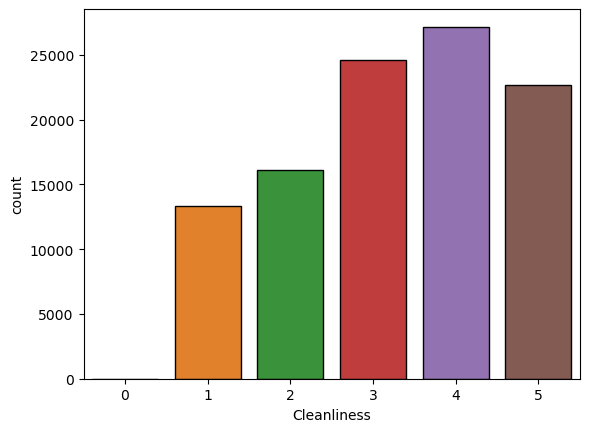

In [15]:
# What was the Satisfaction level of Cleanliness
sns.countplot(x="Cleanliness",data=df,edgecolor="black");


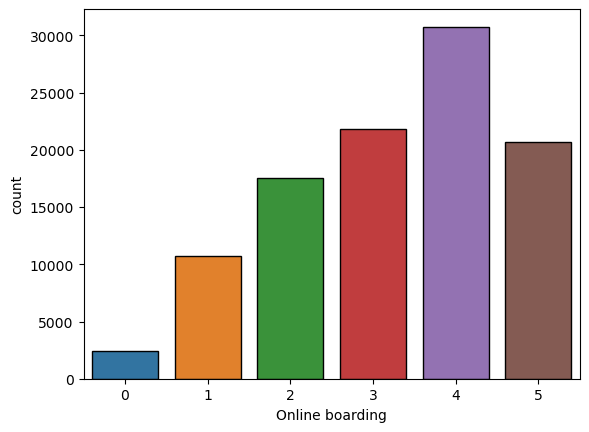

In [16]:
# what was the Satisfaction level of online boarding
sns.countplot(x="Online boarding",data=df,edgecolor="black");


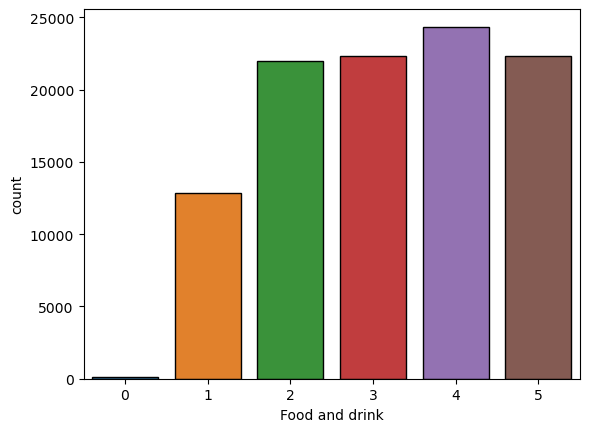

In [17]:
# what was the satisfaction of Food and drink
sns.countplot(x="Food and drink",data=df,edgecolor="black");


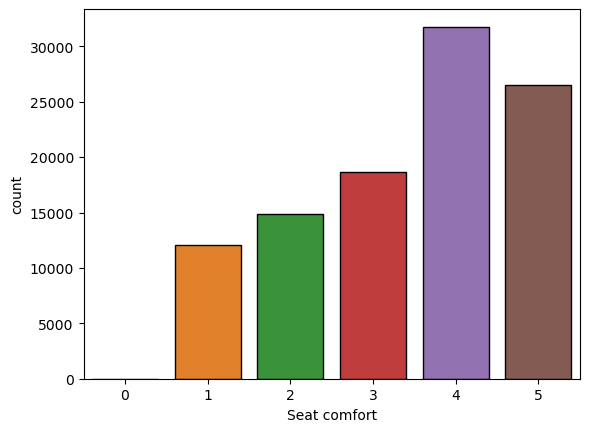

In [18]:
# What was the Satisfaction level of Seat comfort
sns.countplot(x="Seat comfort",data=df,edgecolor="black");

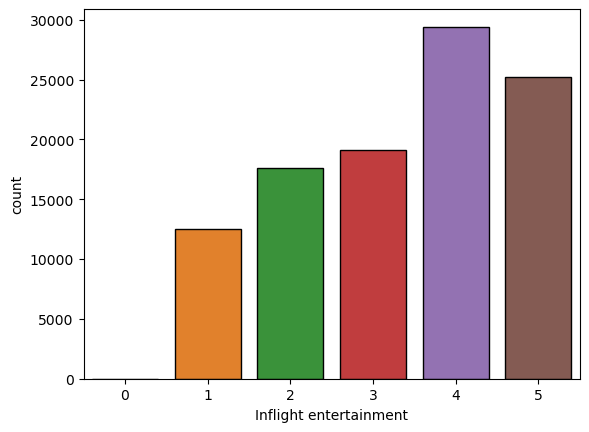

In [19]:
# What was the Satisfaction level of inflight entertainment
sns.countplot(x="Inflight entertainment",data=df,edgecolor="black");

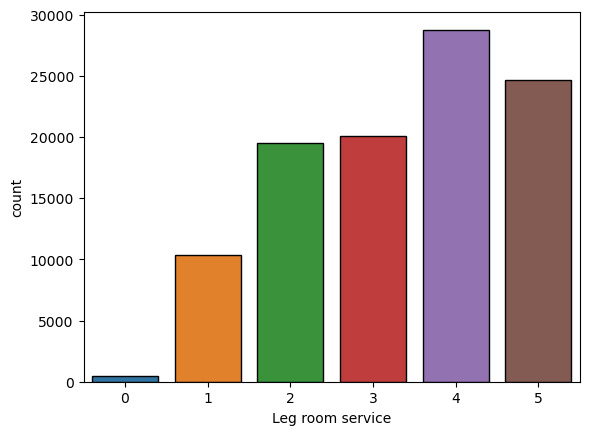

In [20]:
# What was the Satisfaction level of Leg room service
sns.countplot(x="Leg room service",data=df,edgecolor="black");


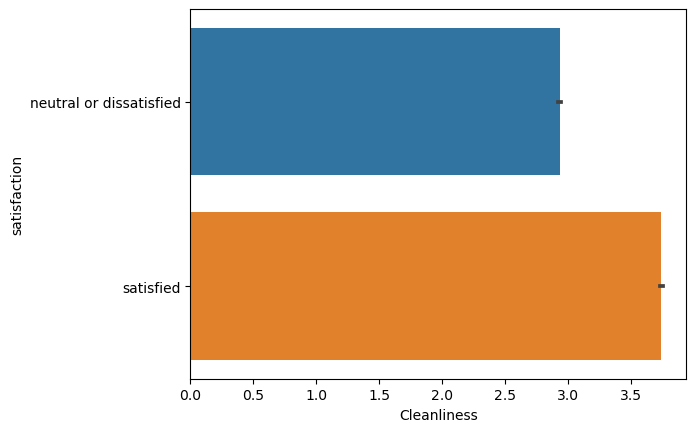

In [21]:
sns.barplot(x='Cleanliness', y='satisfaction', data=df);

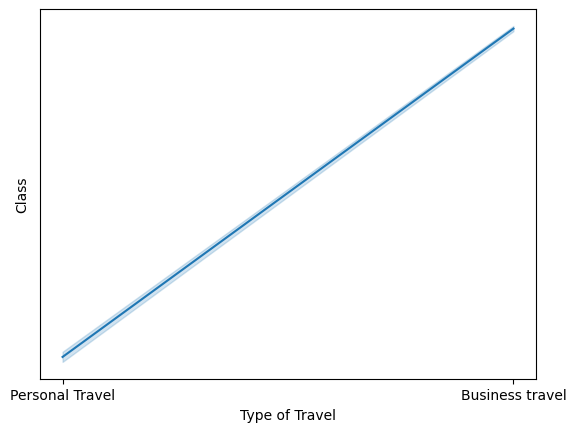

In [22]:
sns.lineplot(x='Type of Travel', y='Class', data=df);

### Find out the outliers present in the data set using Boxplot

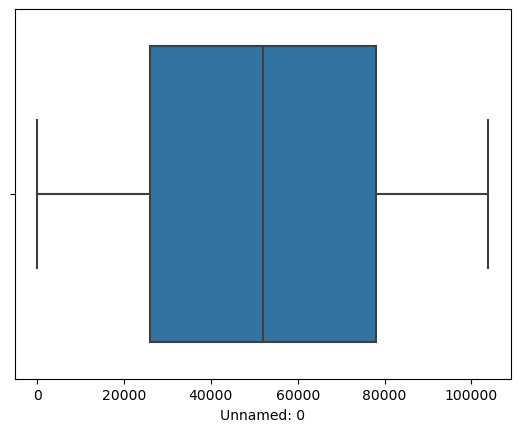

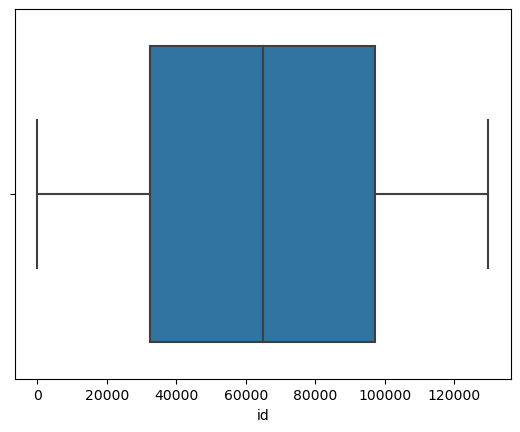

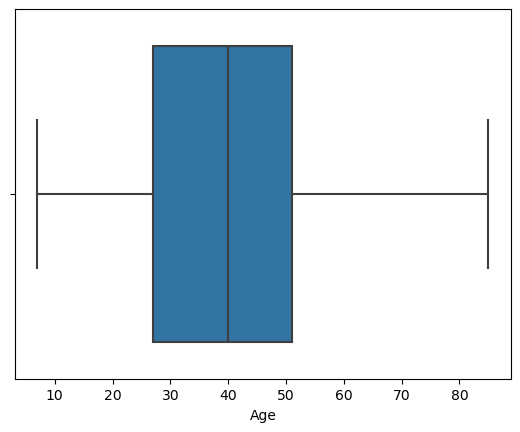

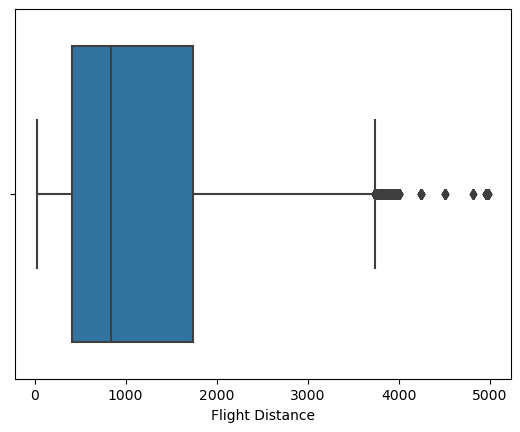

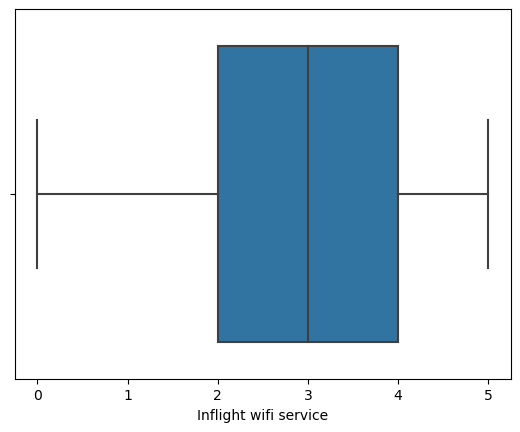

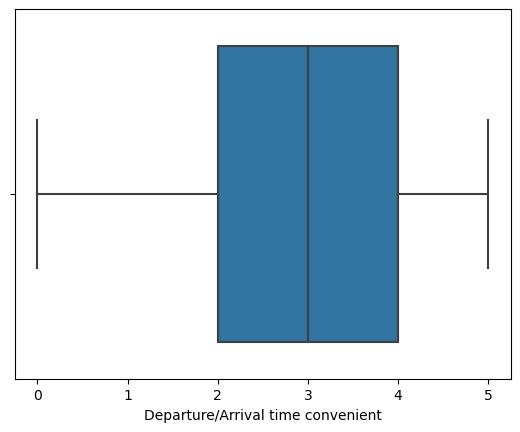

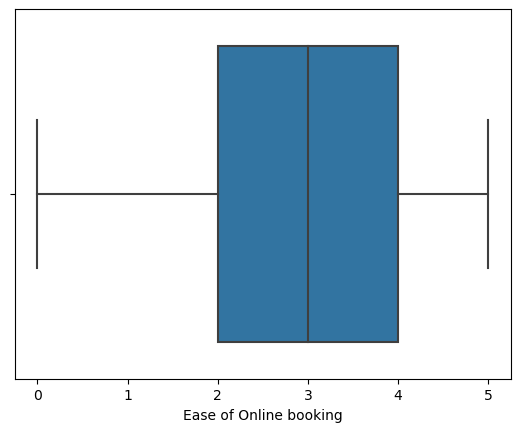

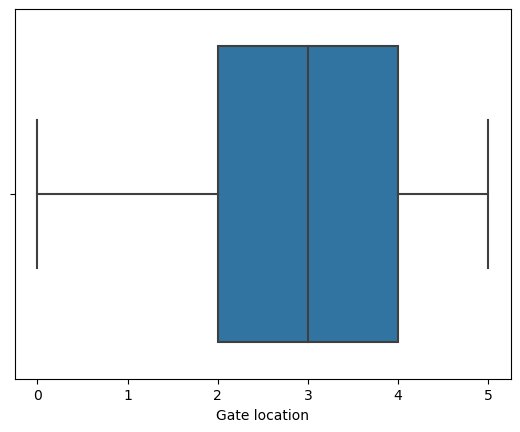

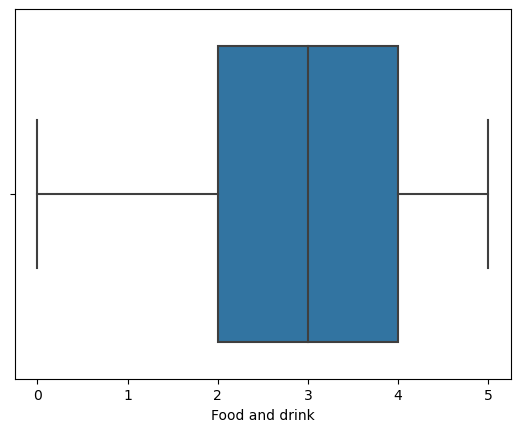

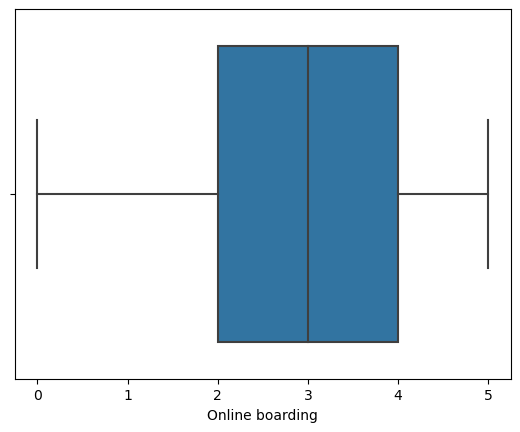

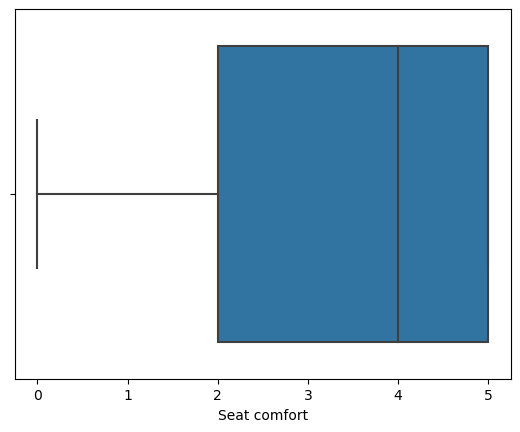

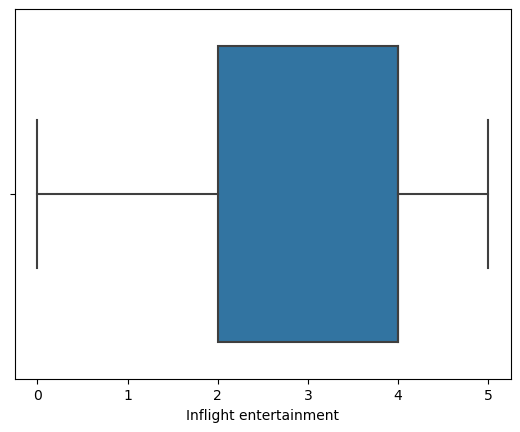

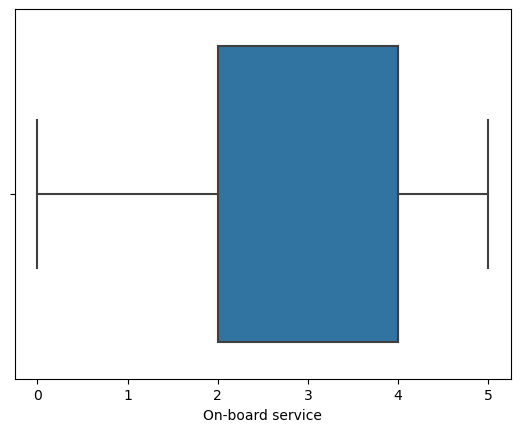

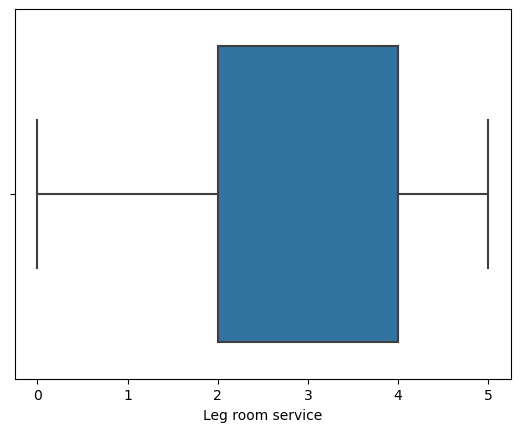

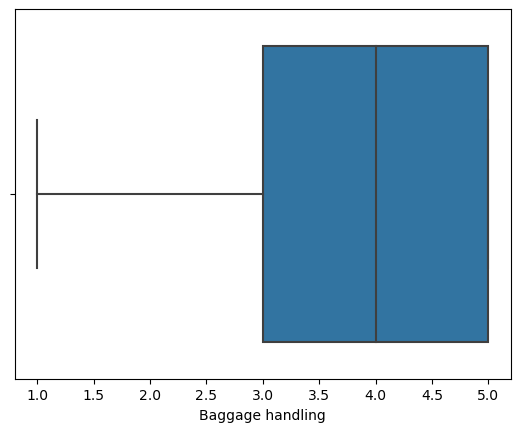

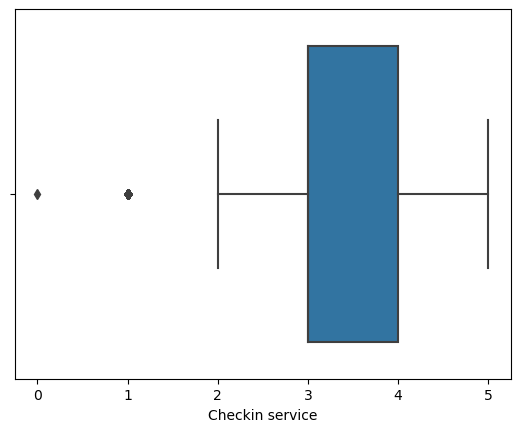

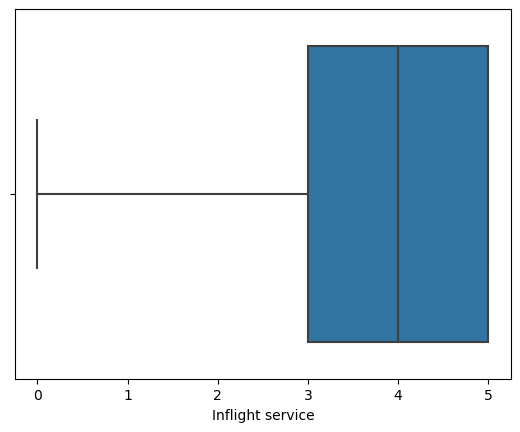

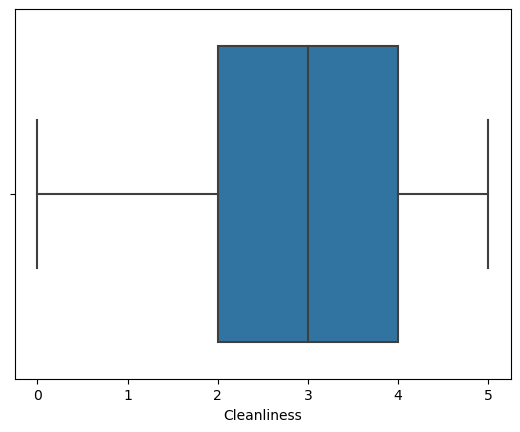

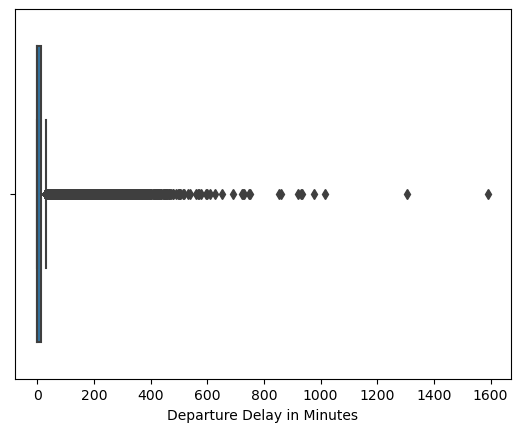

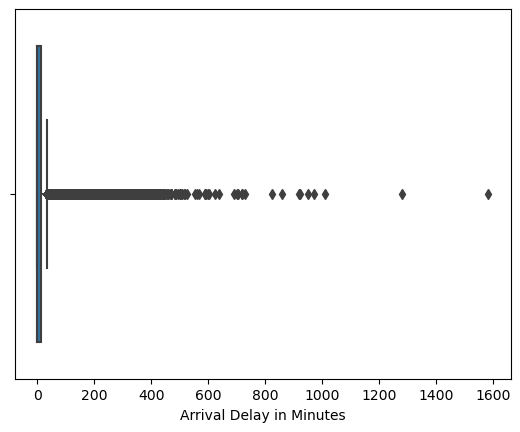

In [23]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.boxplot( x =df[i])
        plt.show()

## Setting the outlier limits

In [24]:
def outlier_limit(col):
    Q3, Q1 =np.nanpercentile (col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [25]:
for column in df.columns:
    if df[column].dtype !="object":
        UL,LL= outlier_limit(df[column])
        df[column] = np.where((df[column]>UL)|(df[column]<LL), np.nan, df[column])
 

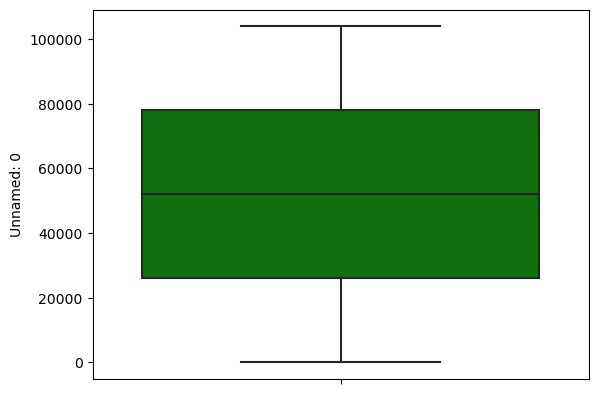

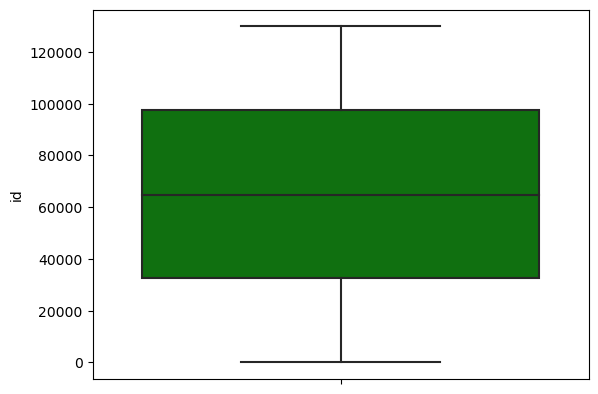

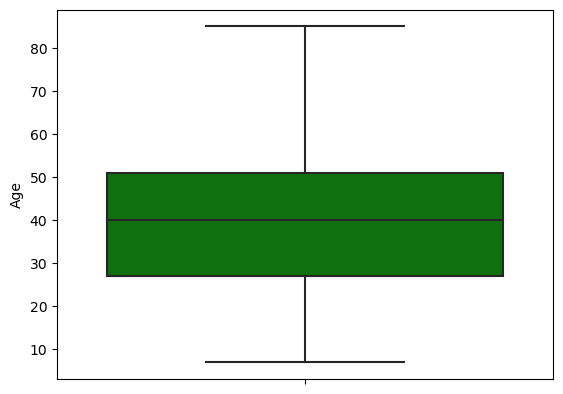

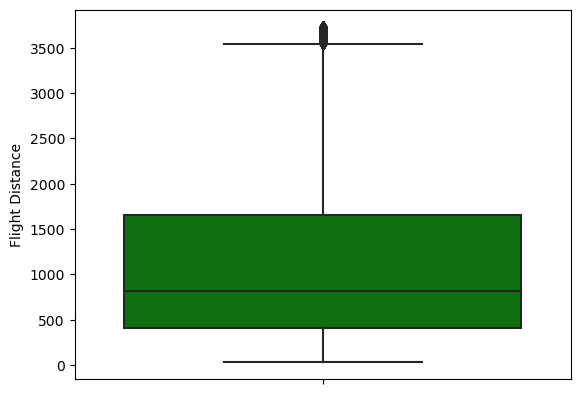

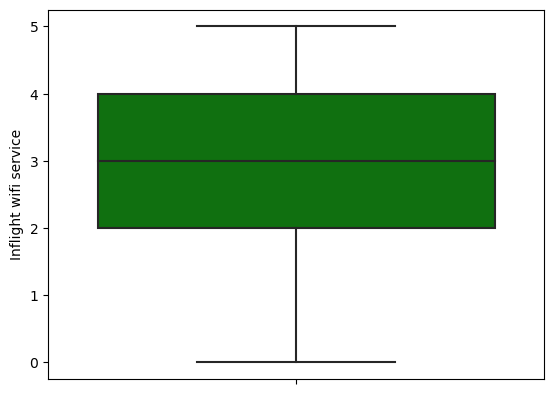

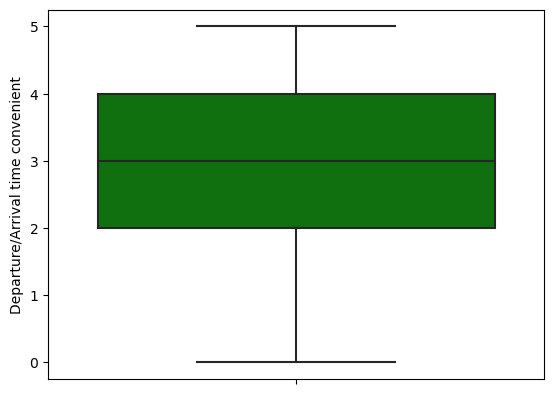

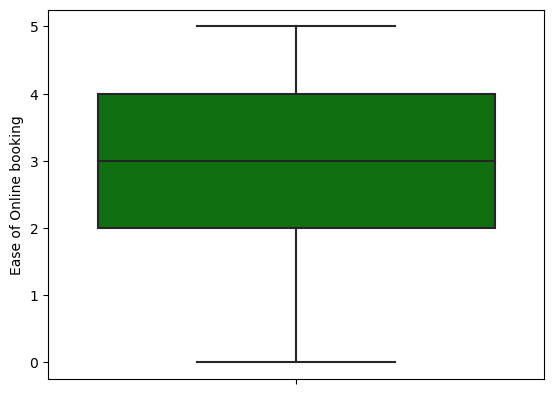

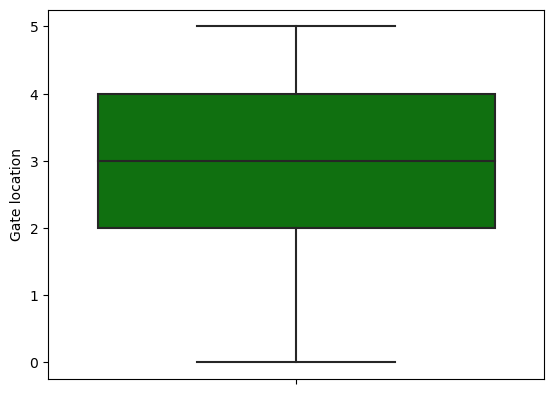

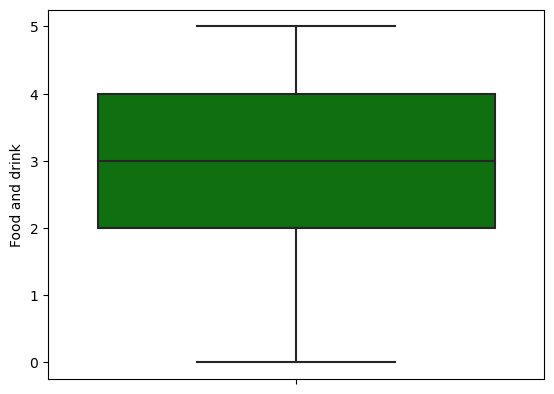

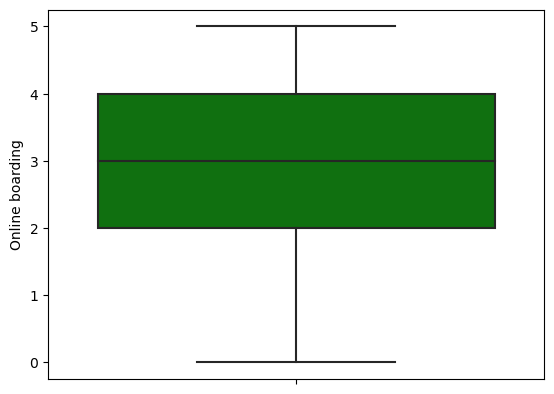

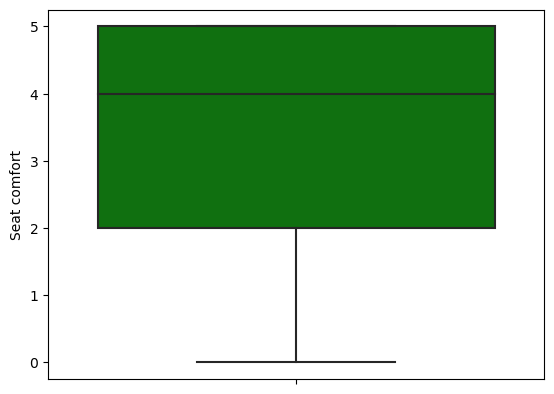

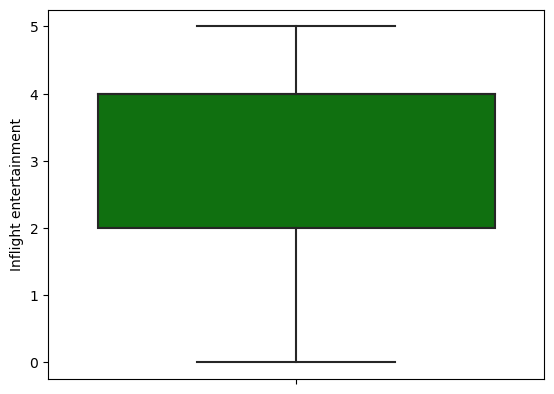

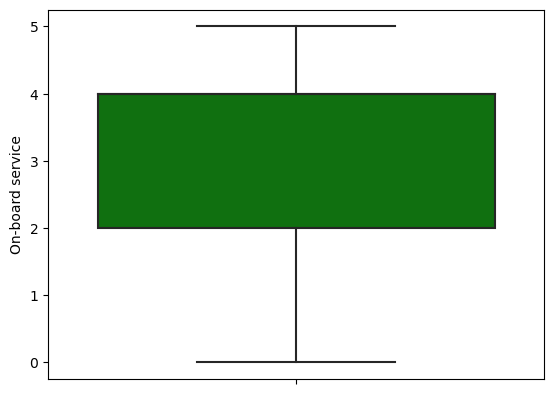

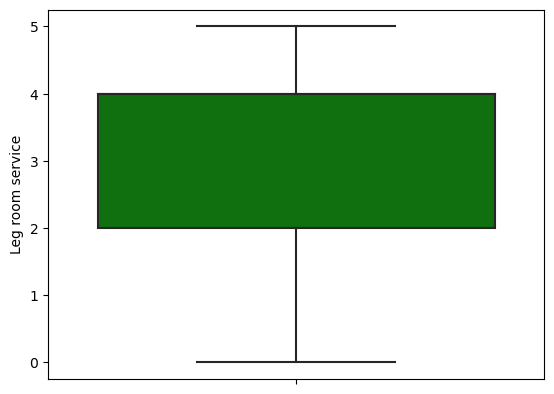

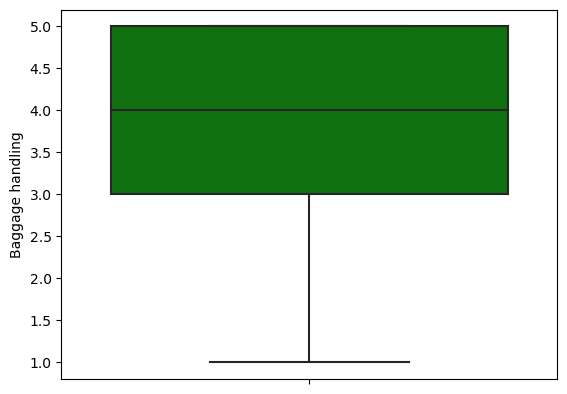

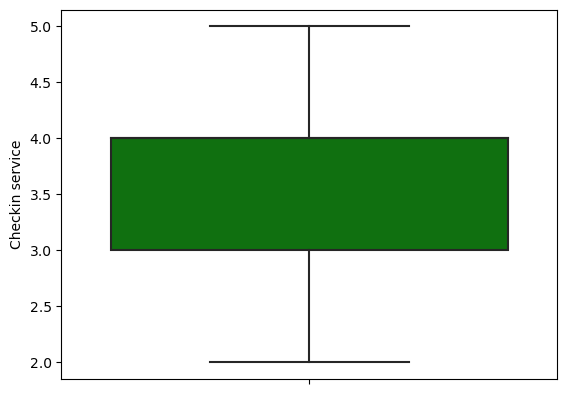

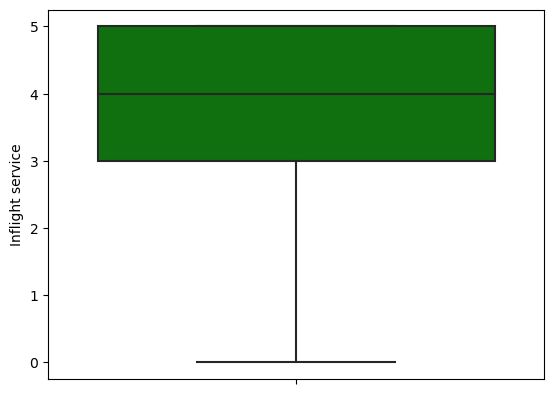

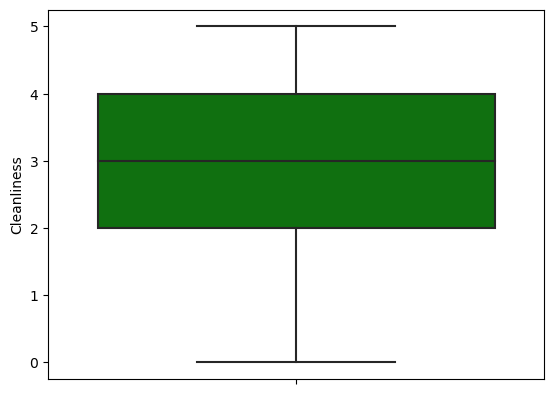

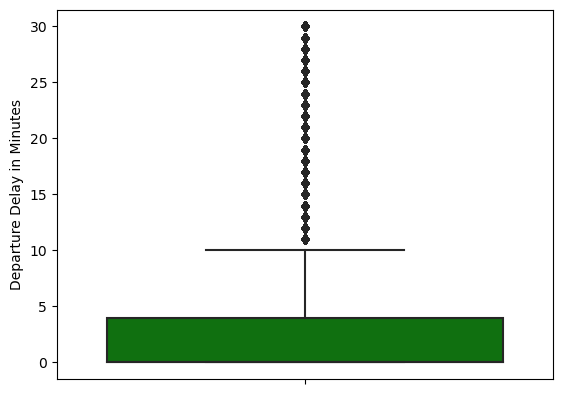

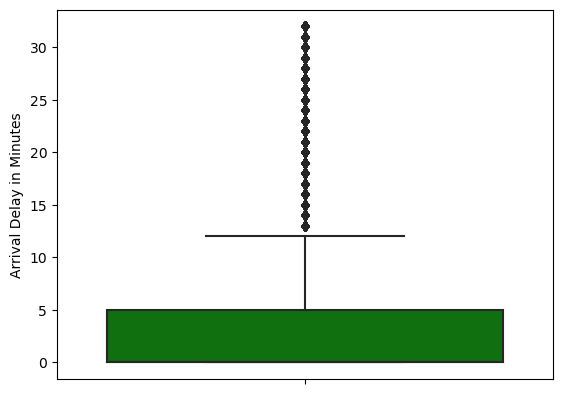

In [26]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.boxplot(y=df[i], color="green")
    plt.show();

In [27]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74743 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         74743 non-null  float64
 1   id                                 74743 non-null  float64
 2   Gender                             74743 non-null  object 
 3   Customer Type                      74743 non-null  object 
 4   Age                                74743 non-null  float64
 5   Type of Travel                     74743 non-null  object 
 6   Class                              74743 non-null  object 
 7   Flight Distance                    74743 non-null  float64
 8   Inflight wifi service              74743 non-null  float64
 9   Departure/Arrival time convenient  74743 non-null  float64
 10  Ease of Online booking             74743 non-null  float64
 11  Gate location                      74743 non-null  fl

## Label Encoder

## converting object data to numeric

In [28]:
le =LabelEncoder()

In [29]:
df["Gender"]=le.fit_transform(df["Gender"])
df["Customer Type"]=le.fit_transform(df["Customer Type"])
df["Type of Travel"]=le.fit_transform(df["Type of Travel"])
df["Class"]=le.fit_transform(df["Class"])
df["satisfaction"]=le.fit_transform(df["satisfaction"])

## Checking the correlation with the target 'satisfaction' using Heatmap

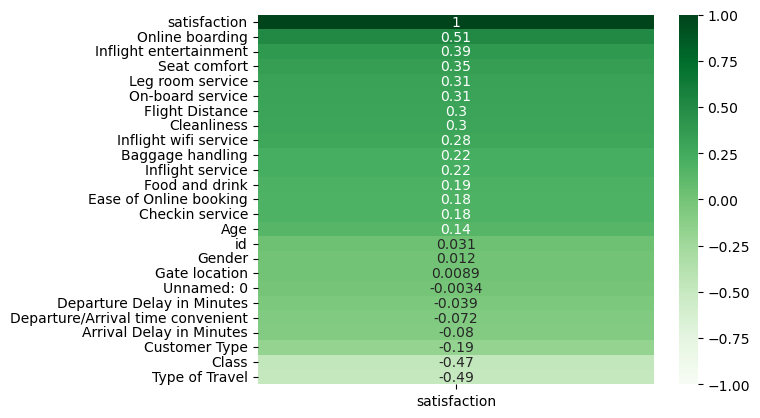

In [30]:
sns.heatmap(df.corr()[["satisfaction"]].sort_values(by="satisfaction", ascending=False), vmin=-1, vmax=1, annot=True,cmap="Greens");

## Lets take only with good correlation with target


### Then i take Engine and date values in x and satisfactions values in y for prediction purpose¶

In [31]:
x=df[['Inflight entertainment','Online boarding']].values
y=df[['satisfaction']].values

## Feature Scaling

### Then i take MinMaxScaler for scalling and then i done cross validation to find out the best model

In [32]:
sc= StandardScaler()

In [33]:
x=sc.fit_transform(x)

## splitting the data into training and testing set

In [34]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=0)

## Crossvalidation

In [35]:
models = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "RandomForestClassifier":RandomForestClassifier()
}

In [36]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="accuracy",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    print("Mean Score: ",np.mean(scores))
    print("*"*100)

cross validation model : LogisticRegression
Mean Score:  0.7942415777146729
****************************************************************************************************
cross validation model : DecisionTreeClassifier
Mean Score:  0.8200366380486914
****************************************************************************************************
cross validation model : GradientBoostingClassifier
Mean Score:  0.8200366380486914
****************************************************************************************************
cross validation model : RandomForestClassifier
Mean Score:  0.8200366380486914
****************************************************************************************************


## We can see that the model with high accuracy is LogisticRegression. We may proceed with it:
 
 ###  Model Prediction
  

In [37]:
model = GradientBoostingClassifier()

In [38]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))

model trained with GradientBoostingClassifier()
Model accuracy on train is::  0.8204167642238351
Model accuracy on test is::  0.8185162887149642
confusion_matrix train is::  [[27265  4643]
 [ 6095 21791]]
confusion_matrix test is::  [[6837 1154]
 [1559 5399]]
Wrong Predictions made: 110784391 / 223472601


### After predicting the y value i decided to compare it with actual value¶

In [39]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"),dtype=float)
OUTPUT

,ACTUAL,PREDICTION
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,0.0,0.0
4,0.0,0.0
...,...,...
74738,0.0,0.0
74739,1.0,1.0
74740,0.0,0.0
74741,0.0,0.0


Model used is::  GradientBoostingClassifier()


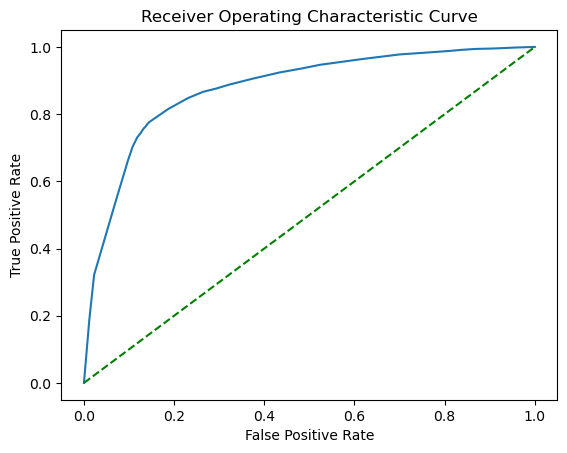

In [40]:
model.fit(x_train, y_train)
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("Model used is:: ",model)
sns.lineplot(x= fpr, y=tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()

## CONCLUSION

After the calculation i found that the customer satisfaction is related with the other factors also.